# Data Classification

1. This report aims to classify the data into three classes
    - data scientist, data analyst, and data engineer
2. The following features are provided
    - Job Title, Rating, Company Name, Location, Headquarters, Type of ownership, Industry, Sector, lower_salary, upper_bound Minimum Size, Maximum Size
3. The machine learning models we use includes
    - Binary classification: logistic regression, and logistic regression with cross validation
    - Multi-class classification: KNN,decision tree, random forest, and gradient boost
4. We aim to find the best model for classification in this data set, as well as finding the relevant features

In [1]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

# --------------------------PREPARE THE DATA--------------------------

#### 1. Load df

In [2]:
df_scientist = pd.read_excel("Cleaned_DataScientist.xlsx", engine='openpyxl')
df_analyst = pd.read_excel("Cleaned_DataAnalyst.xlsx", engine='openpyxl')
df_engineer = pd.read_excel("Cleaned_DataEngineer.xlsx", engine='openpyxl')

#### 2. Add domain for classification

In [3]:
df_scientist['Domain'] = 'Scientist'
df_analyst['Domain'] = 'Analyst'
df_engineer['Domain'] = 'Engineer'

In [4]:
# Combine three dataframes
df_all = pd.concat([df_scientist, df_analyst, df_engineer], ignore_index=True, sort=False)
df_all = df_all[["Job Title", "Rating", "Company Name", "Location", "Headquarters", "Type of ownership", "Industry", "Sector", "lower_salary", "upper_bound", "Minimum Size", "Maximum Size", "Domain"]]
df_all.head(5)

,Job Title,Rating,Company Name,Location,Headquarters,Type of ownership,Industry,Sector,lower_salary,upper_bound,Minimum Size,Maximum Size,Domain
0,Senior Data Scientist,3.5,Hopper,"New York, NY","Montreal, Canada",Company - Private,Travel Agencies,Travel & Tourism,111000.0,181000,501,1000.0,Scientist
1,"Data Scientist, Product Analytics",4.5,Noom US,"New York, NY","New York, NY",Company - Private,"Health, Beauty, & Fitness",Consumer Services,111000.0,181000,1001,5000.0,Scientist
2,Data Science Manager,-1.0,Decode_M,"New York, NY","New York, NY",Unknown,-1,-1,111000.0,181000,1,50.0,Scientist
3,Data Analyst,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",Company - Private,Internet,Information Technology,111000.0,181000,201,500.0,Scientist
4,"Director, Data Science",3.4,United Entertainment Group,"New York, NY","New York, NY",Company - Private,Advertising & Marketing,Business Services,111000.0,181000,51,200.0,Scientist


#### 3. Prepare the x label and perform encoding

In [5]:
x_df = df_all.drop('Domain', axis = 1)
x_df = x_df.apply(LabelEncoder().fit_transform)
x_df.head()

,Job Title,Rating,Company Name,Location,Headquarters,Type of ownership,Industry,Sector,lower_salary,upper_bound,Minimum Size,Maximum Size
0,3109,22,1416,204,476,2,101,25,84,120,4,4
1,1458,32,2129,204,508,2,53,8,84,120,5,5
2,1276,0,894,204,508,14,0,0,84,120,1,1
3,689,21,2641,175,424,2,61,13,84,120,3,3
4,1640,21,3208,204,508,2,2,6,84,120,2,2


# ------------------------------Functions------------------------------

#### 1. Print Evaluation

In [6]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

def print_evaluate(classifier, y_test, prediction):  
    scores_accuracy = cross_val_score(classifier, x_df, y_df, cv=10, scoring='accuracy')
    scores_f1 = cross_val_score(classifier, x_df, y_df, cv=10, scoring='f1_macro')
    print('K-fold cross-validation results:')
    print(classifier.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
    print(classifier.__class__.__name__+" average f1 is %2.3f" % scores_f1.mean())
    print('Classification report: ')
    print(classification_report(y_test, prediction))

#### 2. Plot the AUC (area underneath the ROC curve)

In [7]:
from sklearn.metrics import roc_curve, auc
def plot_auc(y_test, prediction):
    [fpr, tpr, thr] = roc_curve(y_test, prediction)
    idx = np.min(np.where(tpr > 0.8))
    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

#### 3. Finding the best parameters for random forest

# -------------------------------RESULTS----------------------------------

## 1. Binary Classification

### 1.1 Preparation

##### 1.1.1 Prepare the y label for logistic regression

Let "scientist" be 1, and otherwise 0

In [8]:
y_df = np.where(df_all['Domain']=='Scientist', 1, 0)
y_df

array([1, 1, 1, ..., 0, 0, 0])

##### 1.1.2 Perform train test split for logistic regression

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)

### 1.2 Logistic regression

##### 1.2.1 Define a logistic regression classifier

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)

##### 1.2.2 Produce a confusion matrix for the logistic regression

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[740, 251],
       [361, 386]], dtype=int64)

##### 1.2.3 Print the evaluation

In [12]:
print_evaluate(logreg, y_test, prediction)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.593
LogisticRegression average f1 is 0.572
Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       991
           1       0.61      0.52      0.56       747

    accuracy                           0.65      1738
   macro avg       0.64      0.63      0.63      1738
weighted avg       0.64      0.65      0.64      1738



##### 1.2.4 Print AUC

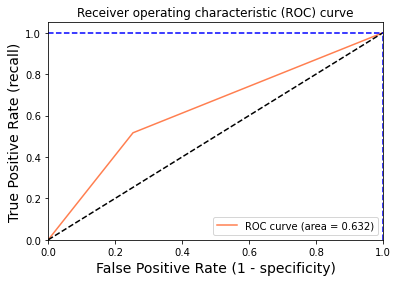

In [13]:
plot_auc(y_test, prediction)

### 1.3 Logistic regression with cross validation 

##### 1.3.1 Prepare a classifier

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

logreg_c = LogisticRegression()
logreg_c.fit(X_train, y_train)

prediction = logreg_c.predict(X_test)

##### 1.3.2 Print the evaluation

In [15]:
print_evaluate(logreg_c, y_test, prediction)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.593
LogisticRegression average f1 is 0.572
Classification report: 
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       991
           1       0.65      0.50      0.57       747

    accuracy                           0.67      1738
   macro avg       0.66      0.65      0.65      1738
weighted avg       0.66      0.67      0.66      1738



##### 1.3.3 Print AUC

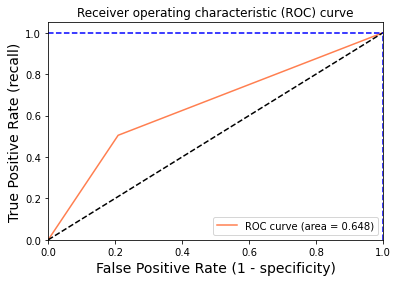

In [16]:
plot_auc(y_test, prediction)

### 1.4 Binary classification Conclusion

Cross validation can improve the performance of logistic regression

## 2. Multi-class Classification

### 2.1 Preparation

##### 2.1.1 Prepare the y label for classification

In [17]:
y_df = df_all['Domain']

##### 2.1.2 Print the ground truth values (i.e., expected values)

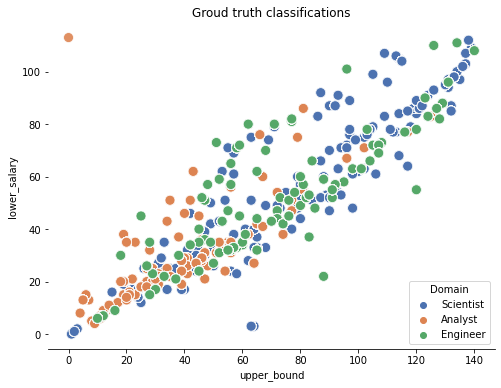

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='upper_bound', y='lower_salary', data=x_df, hue=y_df, palette='deep', s=100, alpha=0.9).set_title("Groud truth classifications")
sns.despine(left=True)

##### 2.1.3 Encode the y_label

Scientist => 0, Analyst => 1, Engineer => 2

In [19]:
data_class = {'Scientist':0, 'Analyst':1, 'Engineer':2}
df_all['domain_num'] = [data_class[i] for i in df_all.Domain]
y_df = df_all["domain_num"]

##### 2.1.4 Perform train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=15)

### 2.2 KNN

##### 2.2.1 Create a KNN classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
knn.score(X_test, y_test)

0.5189873417721519

##### 2.2.2 Print the evaluation

In [22]:
print_evaluate(knn, y_test, prediction)

K-fold cross-validation results:
KNeighborsClassifier average accuracy is 0.492
KNeighborsClassifier average f1 is 0.471
Classification report: 
              precision    recall  f1-score   support

           0       0.53      0.61      0.57       799
           1       0.48      0.40      0.44       446
           2       0.52      0.47      0.50       493

    accuracy                           0.52      1738
   macro avg       0.51      0.50      0.50      1738
weighted avg       0.52      0.52      0.52      1738



##### 2.2.3 KNN conclusion

The performance of KNN is not desirable in this data set

### 2.3 Decision Tree

##### 2.3.1 Create a classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
prediction = dtc.predict(X_test)

##### 2.3.2 Print evaluation

In [24]:
print_evaluate(dtc, y_test, prediction)

K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.457
DecisionTreeClassifier average f1 is 0.432
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       799
           1       0.92      0.87      0.89       446
           2       0.90      0.91      0.91       493

    accuracy                           0.91      1738
   macro avg       0.91      0.91      0.91      1738
weighted avg       0.91      0.91      0.91      1738



##### 2.3.3 Evaluate the importance of the features

<AxesSubplot:>

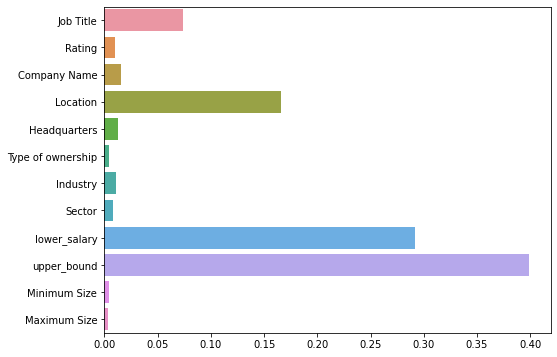

In [25]:
plt.figure(figsize=(8,6))
importance = dtc.feature_importances_
sns.barplot(x=importance, y=x_df.columns)

##### 2.3.4 Print the tree

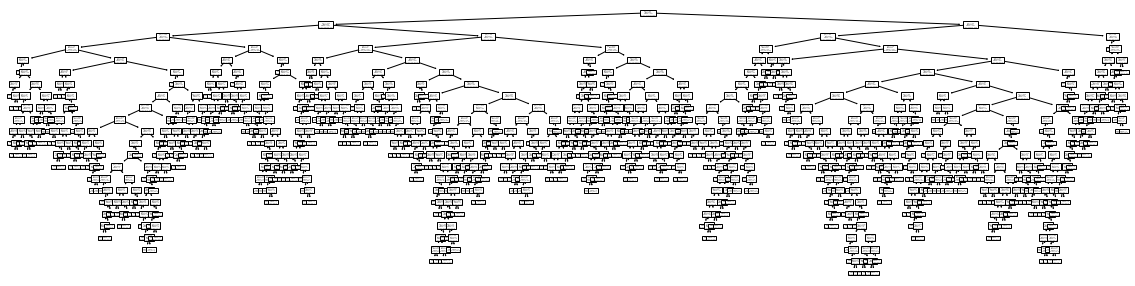

In [26]:
from sklearn import tree
plt.rcParams['figure.figsize'] = [20, 5]
tree.plot_tree(dtc) 
plt.show()

##### 2.3.5 Decision tree conclusion

1. Decision tree can acheive a relatively good result with a f1 score of up to 0.93
2. "Lower salary" and "upper bound" are the most important features

### 2.4 Random forest classifier with cross validation

##### 2.4.1 Create a grid for parameter tuning

In [28]:
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


##### 2.4.2 Create a classifer, and then use the grid to find the best parameter

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

###### - Best parameter

In [30]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [31]:
best_random = rf_random.best_estimator_
prediction = best_random.predict(X_test)

In [32]:
"""prediction = rf_random.predict(X_test)
print_evaluate(rf_random, y_test, prediction)"""

'prediction = rf_random.predict(X_test)\nprint_evaluate(rf_random, y_test, prediction)'

##### 2.4.3 Print the evaluation

In [33]:
print_evaluate(best_random, y_test, prediction)

K-fold cross-validation results:
RandomForestClassifier average accuracy is 0.531
RandomForestClassifier average f1 is 0.508
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       799
           1       0.89      0.89      0.89       446
           2       0.94      0.88      0.91       493

    accuracy                           0.91      1738
   macro avg       0.91      0.90      0.91      1738
weighted avg       0.91      0.91      0.91      1738



##### 2.4.4 Evaluate the importance of the features using the best parameter

<AxesSubplot:>

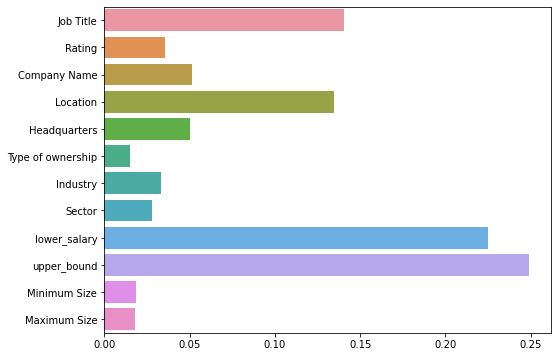

In [35]:
plt.figure(figsize=(8,6))
importance = best_random.feature_importances_
sns.barplot(x=importance, y=x_df.columns)

### 2.5 Gradient boost classification

##### 2.5.1 Create a classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

prediction = gbc.predict(X_test)

##### 2.5.2 Print the evaluation

In [37]:
print_evaluate(gbc, y_test, prediction)

K-fold cross-validation results:
GradientBoostingClassifier average accuracy is 0.561
GradientBoostingClassifier average f1 is 0.545
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       799
           1       0.90      0.82      0.86       446
           2       0.89      0.87      0.88       493

    accuracy                           0.88      1738
   macro avg       0.88      0.87      0.87      1738
weighted avg       0.88      0.88      0.88      1738



##### 2.5.3 Evaluate the importance of features

<AxesSubplot:>

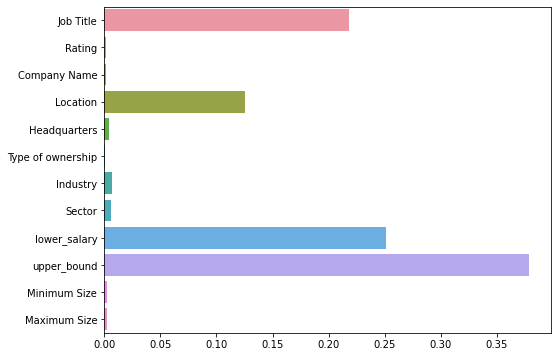

In [38]:
plt.figure(figsize=(8,6))
importance = gbc.feature_importances_
sns.barplot(x=importance, y=x_df.columns)

### 2.6 Gradient boost with cross validation

##### 2.6.1 Create a grid for parameter toning and create a classifier

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators':[100, 200, 300,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 
# Create a based model
gbc = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

##### 2.6.2 Best parameter

In [47]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_leaf': 3,
 'n_estimators': 500}

##### 2.6.3 Print the evaluation

In [49]:
best_grid = grid_search.best_estimator_
prediction = best_grid.predict(X_test)
print_evaluate(best_grid, y_test, prediction)

K-fold cross-validation results:
GradientBoostingClassifier average accuracy is 0.553
GradientBoostingClassifier average f1 is 0.532
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       799
           1       1.00      0.97      0.98       446
           2       0.99      1.00      0.99       493

    accuracy                           0.99      1738
   macro avg       0.99      0.99      0.99      1738
weighted avg       0.99      0.99      0.99      1738



##### Evaluate the importance of the parameters

<AxesSubplot:>

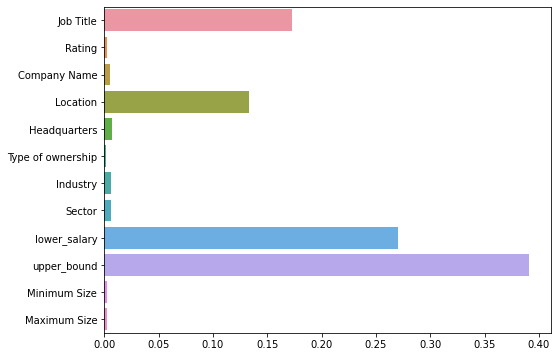

In [51]:
plt.figure(figsize=(8,6))
importance = best_grid.feature_importances_
sns.barplot(x=importance, y=x_df.columns)

# ----------------------------CONCLUSION--------------------------------

###### Out of all the classfiers, the 'gradient boost' with cross validation produced the best performance with the f1 score of up to 0.99.